<a href="https://colab.research.google.com/github/tarunkay7/AIML-IIITH/blob/main/AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [4]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
print(dataset.keys())
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
(20640, 8)
(20640,)


<ipython-input-4-7f8d4971d4cf>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [6]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [7]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [8]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [9]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [19]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 50/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  10404
Number of other samples =  10236
Percent of test data =  50.406976744186046 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [34]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 30/100)

What is the accuracy of our classifiers on the train dataset?

In [35]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16955684007707128


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [36]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.3114293737714125
Validation accuracy using random classifier is  0.16961527660769446


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [31]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel,   99/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.3207305350849087


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [32]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.3397731641676278


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?

Increase Percentage of Validation Set: When you increase the percentage of the validation set, the accuracy on the validation set itself may increase because you're using more data for validation. However, the accuracy might become less reliable as the training set gets smaller, potentially leading to overfitting on the validation data. It's a trade-off between reliability and size.

Decrease Percentage of Validation Set: Reducing the percentage of the validation set will likely lead to a decrease in the accuracy on the validation set. This is because the model has more data for training and may perform better on the training data. However, the validation accuracy becomes more reliable as the training set size increases, which can provide a better estimate of how well the model will perform on unseen data.


2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?

Larger Training Set: A larger training set generally allows the model to learn a better representation of the data, improving its ability to generalize to unseen data . This can result in a more accurate prediction of the test set accuracy using the validation set.

Larger Validation Set: A larger validation set provides a more reliable estimate of the model's performance on unseen data. However, if the validation set is too large and the training set too small, the model might underfit because it hasn't seen enough training data.


3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Cross-Validation: If you want a more robust estimate of model performance and don't want to sacrifice too much data for training, consider using k-fold cross-validation. This technique divides the data into k subsets, training and validating the model k times, and averaging the results. Common values for k are 5 or 10.

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

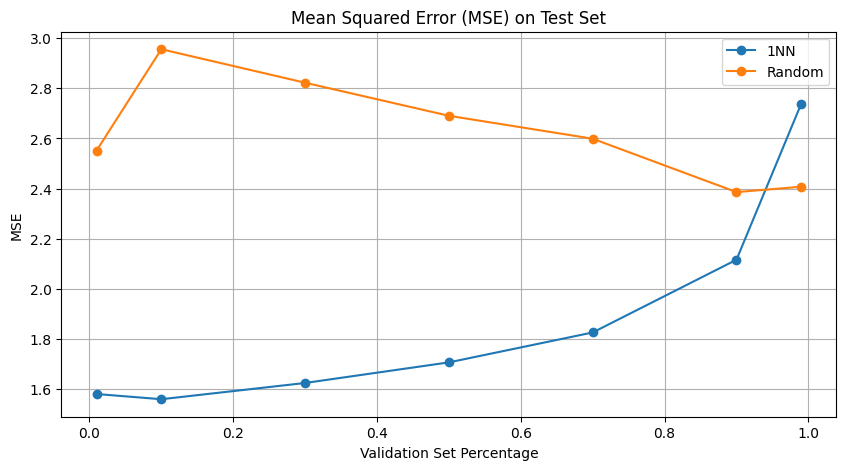

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X = data.data
y = data.target

def RandomClassifier(traindata, trainlabel, testdata):
    classes = np.unique(trainlabel)
    rints = np.random.randint(low=0, high=len(classes), size=len(testdata))
    predlabel = classes[rints]
    return predlabel
split_percentages = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99]
mse_scores_1nn = []
mse_scores_random = []

for split_percentage in split_percentages:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_percentage, random_state=42)

    knn_regressor = KNeighborsRegressor(n_neighbors=1)
    knn_regressor.fit(X_train, y_train)
    y_pred_1nn = knn_regressor.predict(X_test)
    mse_1nn = mean_squared_error(y_test, y_pred_1nn)
    mse_scores_1nn.append(mse_1nn)
    random_pred = RandomClassifier(X_train, y_train, X_test)
    mse_random = mean_squared_error(y_test, random_pred)
    mse_scores_random.append(mse_random)

plt.figure(figsize=(10, 5))
plt.plot(split_percentages, mse_scores_1nn, marker='o', label='1NN')
plt.plot(split_percentages, mse_scores_random, marker='o', label='Random')
plt.title('Mean Squared Error (MSE) on Test Set')
plt.xlabel('Validation Set Percentage')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?

By averaging validation we can reduce the variance in the evaluation. In a single split the specific data points included in the validation set can have a significant impact on the observed accuracy.

2. Does it give more accurate estimate of test accuracy?

it provides a more accurate and less biased estimate of how your model is likely to perform on unseen data compared to a single validation split.

3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?

Increasing the number of iterations in k-fold cross-validation reduces the variability in the estimate of model performance. With more folds, the estimate becomes less dependent on the specific random partitioning of the data.

A larger number of folds ensures that the model is trained and tested on a wider variety of data subsets, which can make the estimate more robust to variations in the data.


4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?

With more iterations, you get more opportunities to utilize the available data for both training and validation. This can be especially helpful when you have a small dataset because it allows you to explore different subsets of the data.

Averaging results over more folds can reduce the variability in the estimated model performance. This means that your estimate of model performance becomes more stable and less dependent on the particular random split of the data.
